In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

Step 2a: Mean center V, U and compute SVD 

In [2]:
U, V = np.load('method1_U.npy'), np.load('method1_V.npy')

V_offsets = np.array([
    np.average(row) 
    for row in V
])

V_mc = np.array([
    row - V_offsets[i]
    for i, row in enumerate(V)
])

U_mc = np.array([
    row - V_offsets[i]
    for i, row in enumerate(U)
])

V_mc.shape, U_mc.shape

((20, 1682), (20, 943))

In [13]:
V_A, V_E, V_B = np.linalg.svd(V_mc)
V_A.shape, V_E.shape, V_B.shape

((20, 20), (20,), (1682, 1682))

In [14]:
V_A12 = V_A[:,:2]
V_A12.shape

(20, 2)

In [15]:
V_A12.T.shape, V_mc.shape

((2, 20), (20, 1682))

In [16]:
V_A12.T.shape, U_mc.shape

((2, 20), (20, 943))

Step 2b: project every movie & user using A1:2

In [19]:
V_proj = V_A12.T @ V_mc
U_proj = V_A12.T @ U_mc
V_proj.shape, U_proj.shape

((2, 1682), (2, 943))

Step 2c: Normalize U,V to have unit variance

In [22]:
U_pn = np.array([
    row / np.var(row)
    for row in U_proj
])

V_pn = np.array([
    row / np.var(row)
    for row in V_proj
])

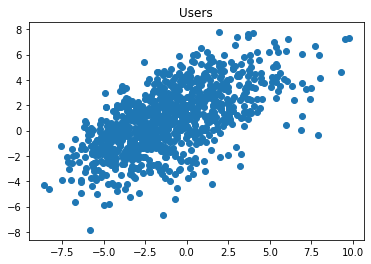

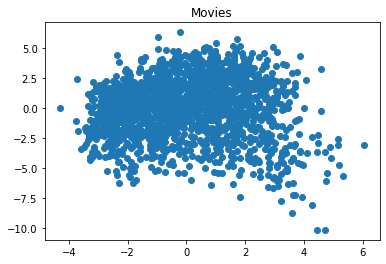

In [26]:
plt.scatter(U_pn[0], U_pn[1])
plt.title("Users")
plt.show()
plt.scatter(V_pn[0], V_pn[1])
plt.title("Movies")
plt.show()

U is users, V is movies. Investigate V: for each genre, color differently. 

In [27]:
data, test, train, movies = pd.read_csv("data/data.csv"), pd.read_csv("data/test.csv"), pd.read_csv("data/train.csv"), pd.read_csv("data/movies.csv")



In [34]:
genres = list(movies.columns[3:])
genres

['Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [35]:
V_pn.shape

(2, 1682)

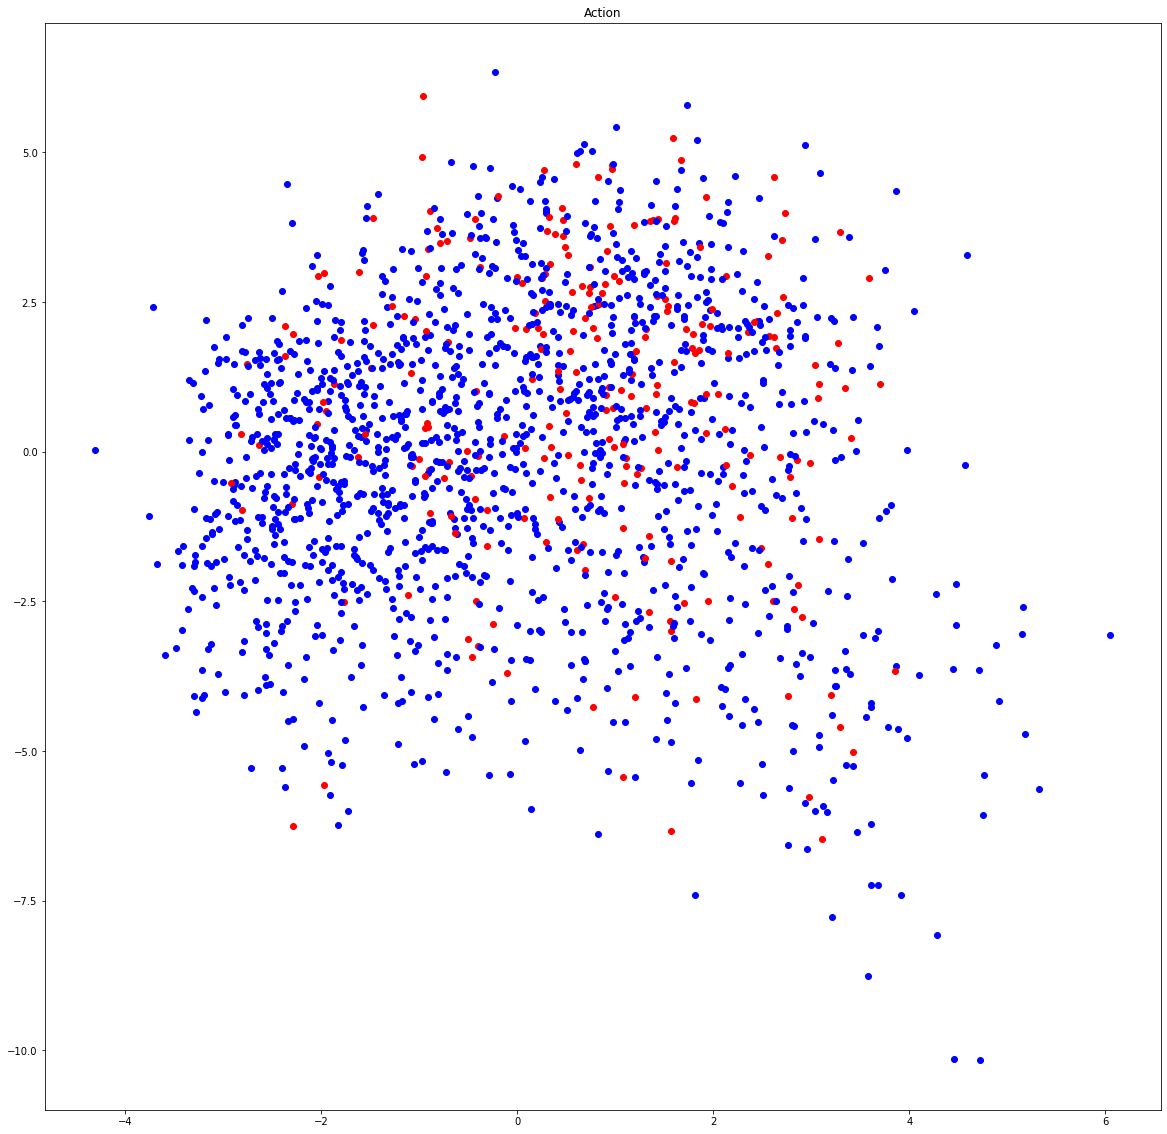

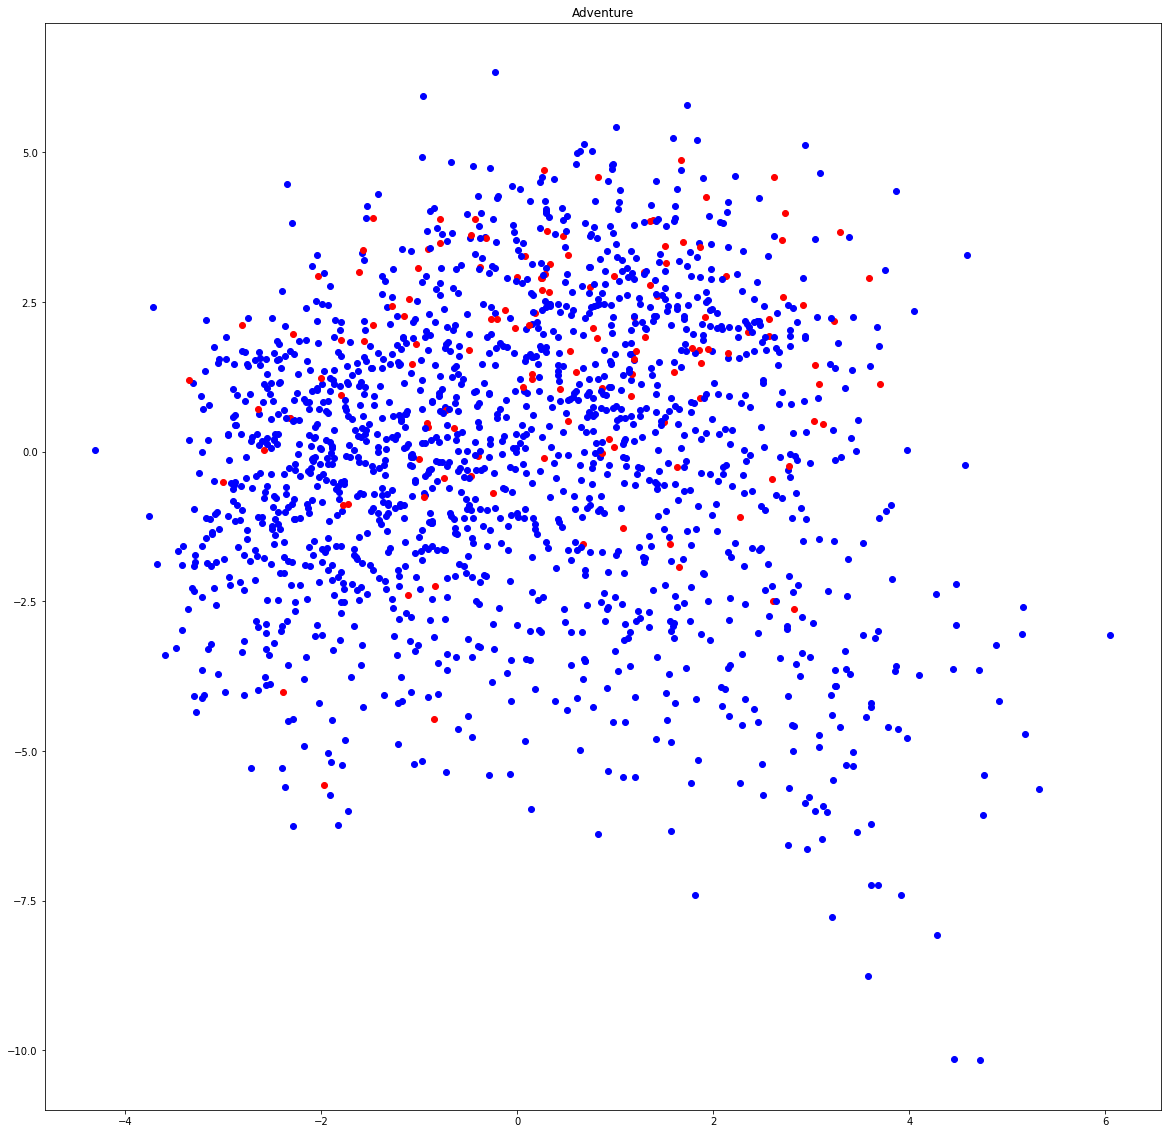

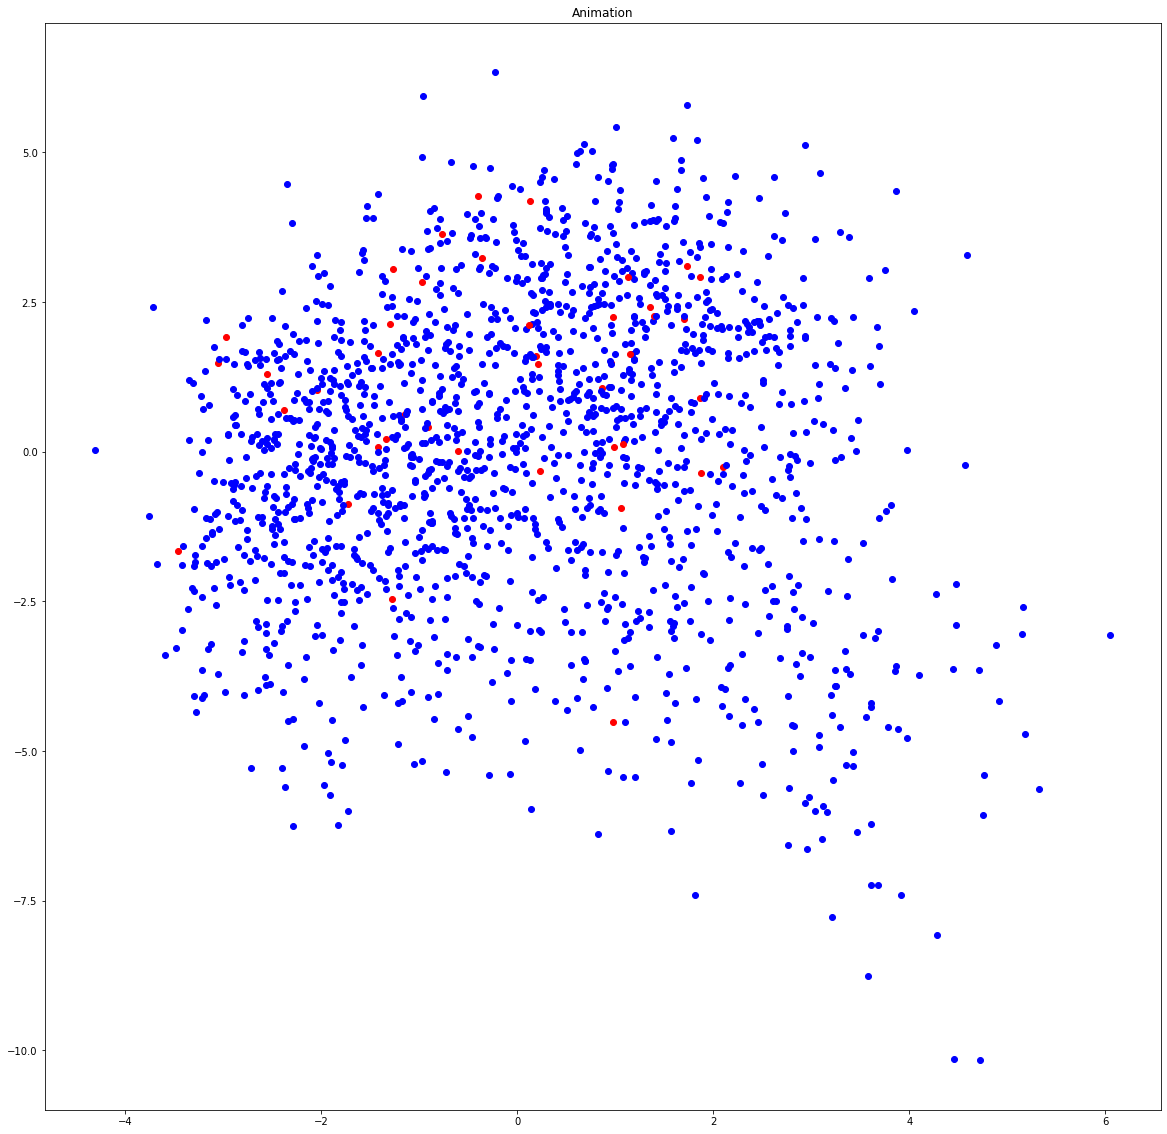

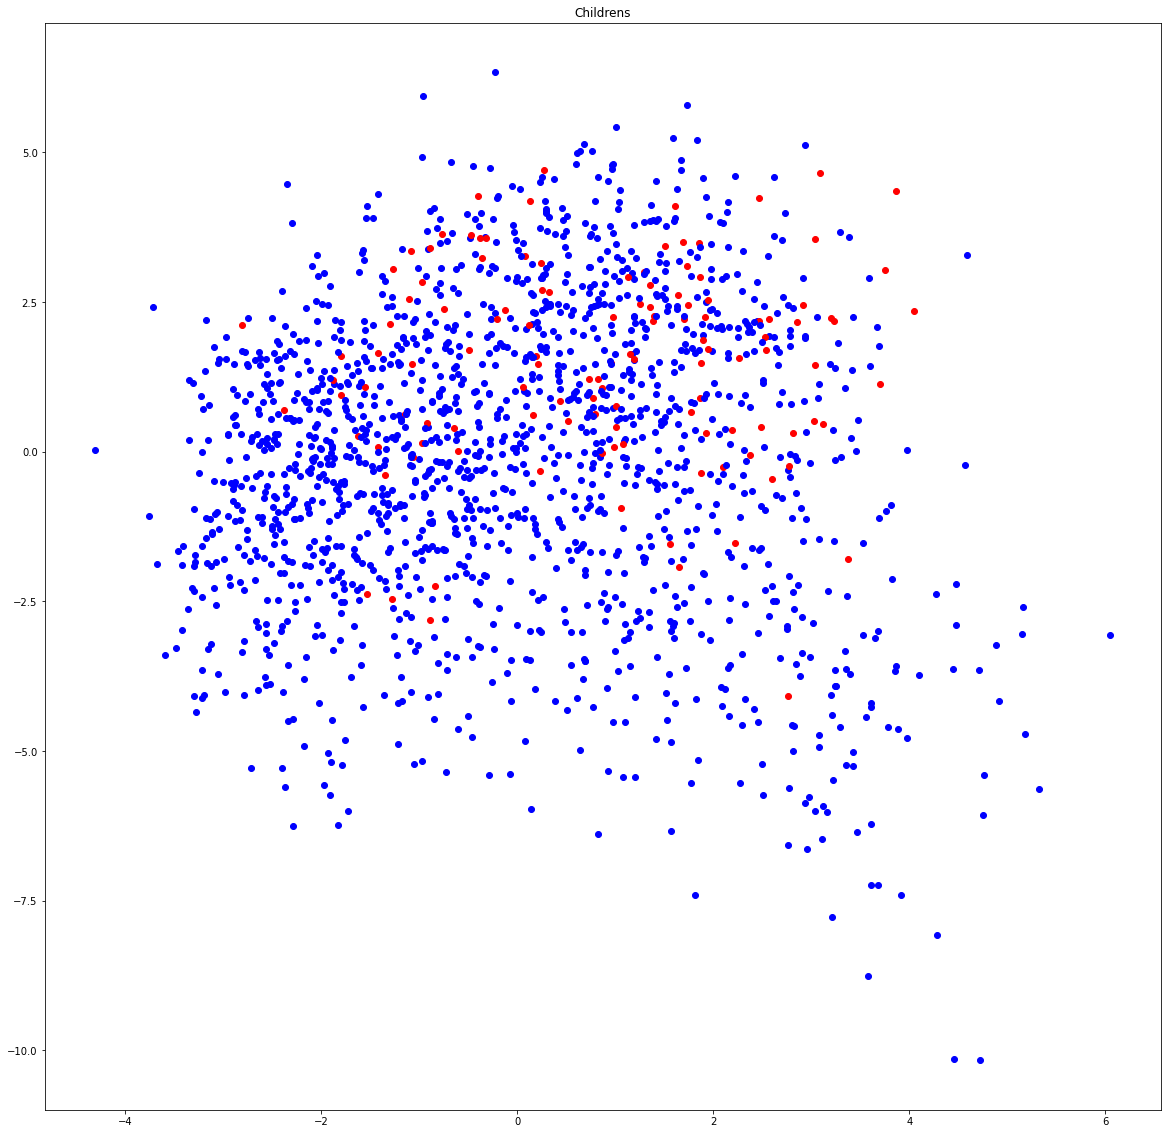

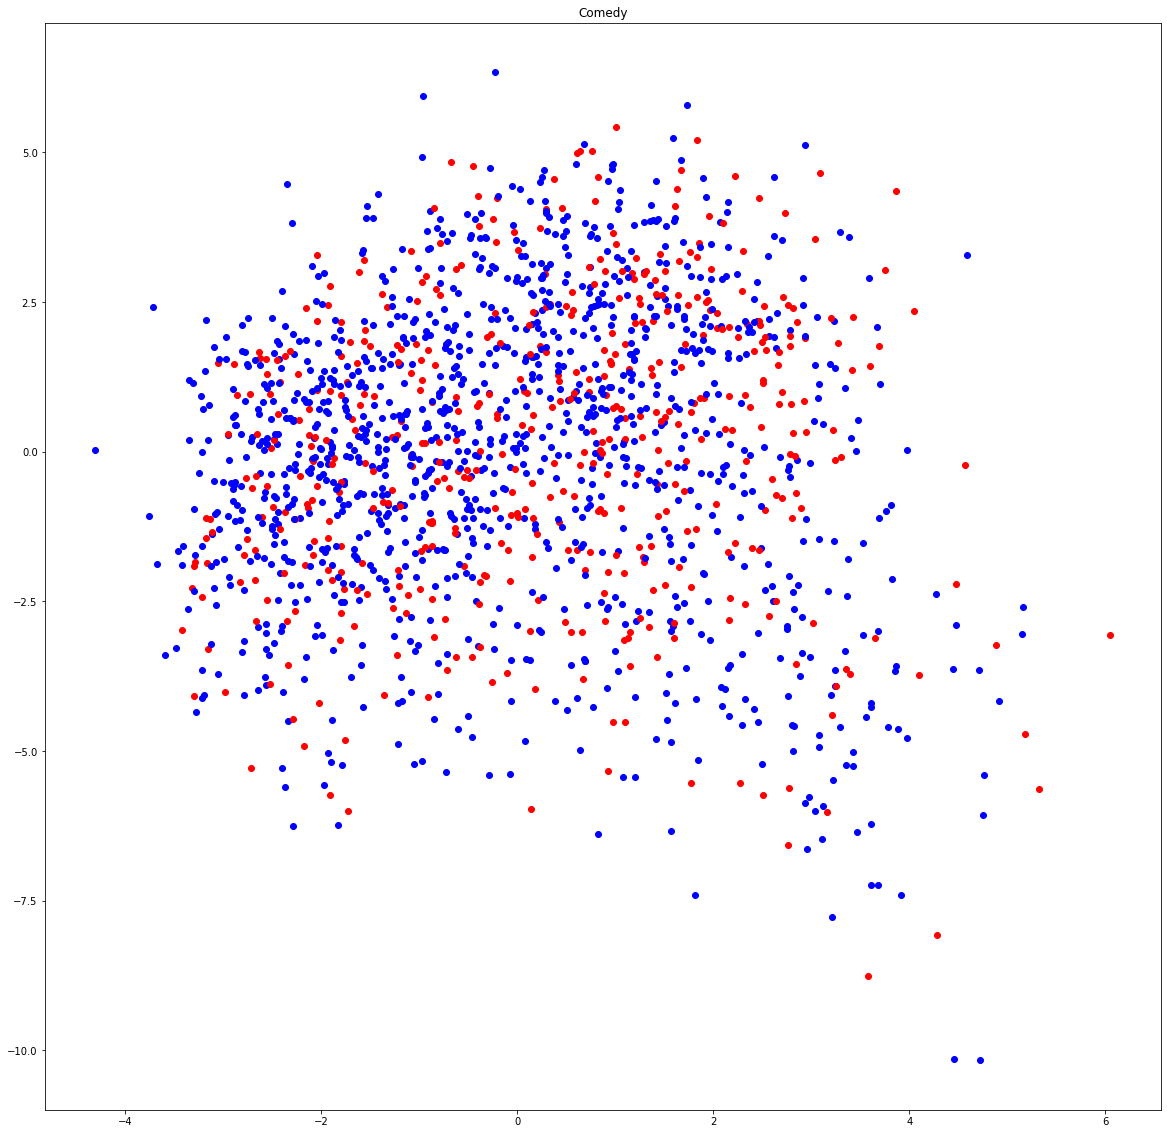

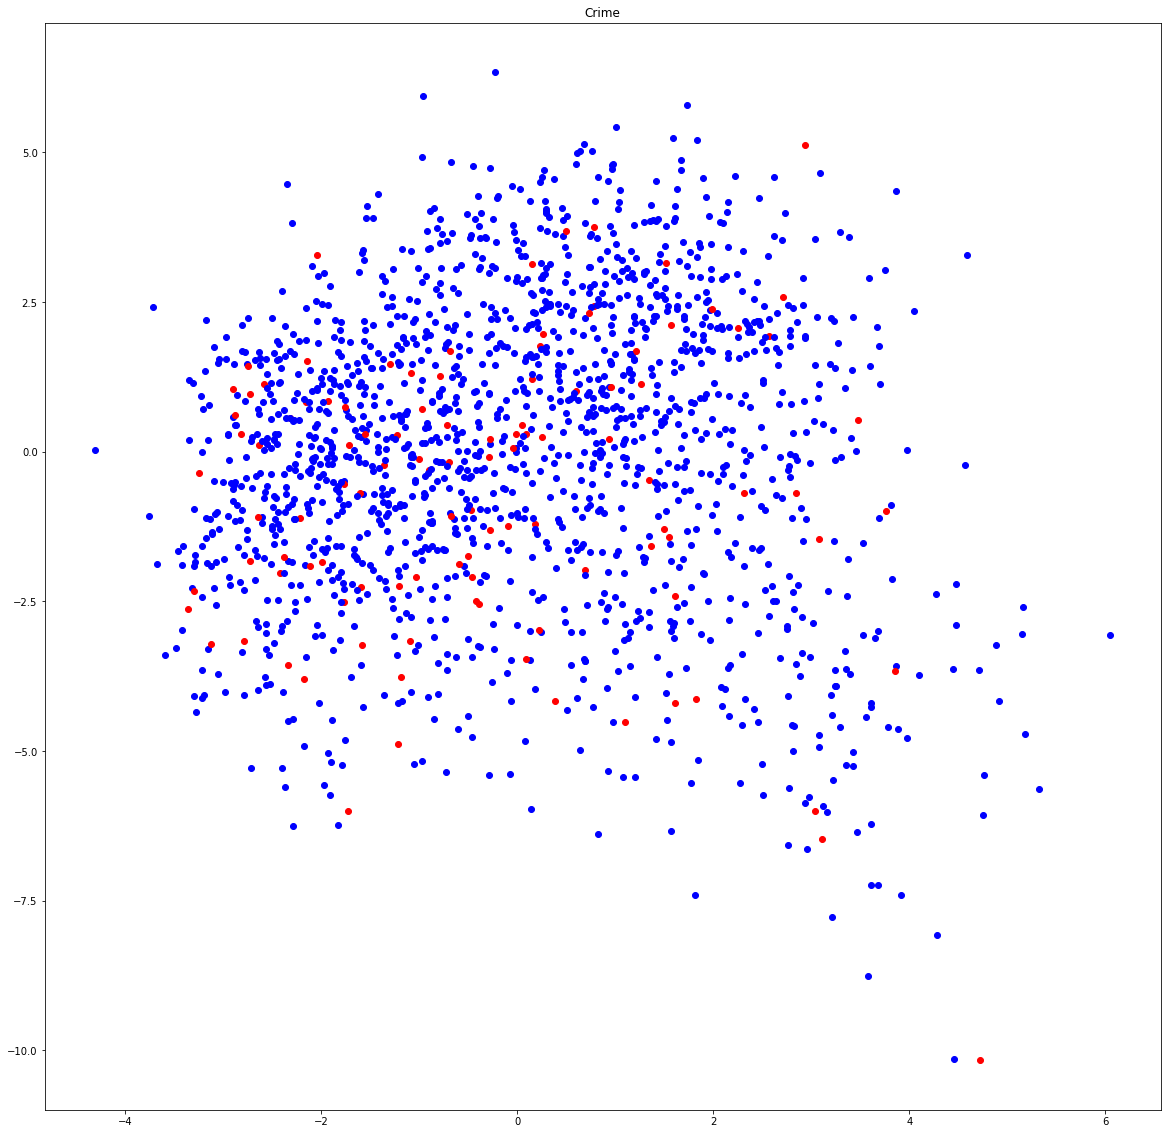

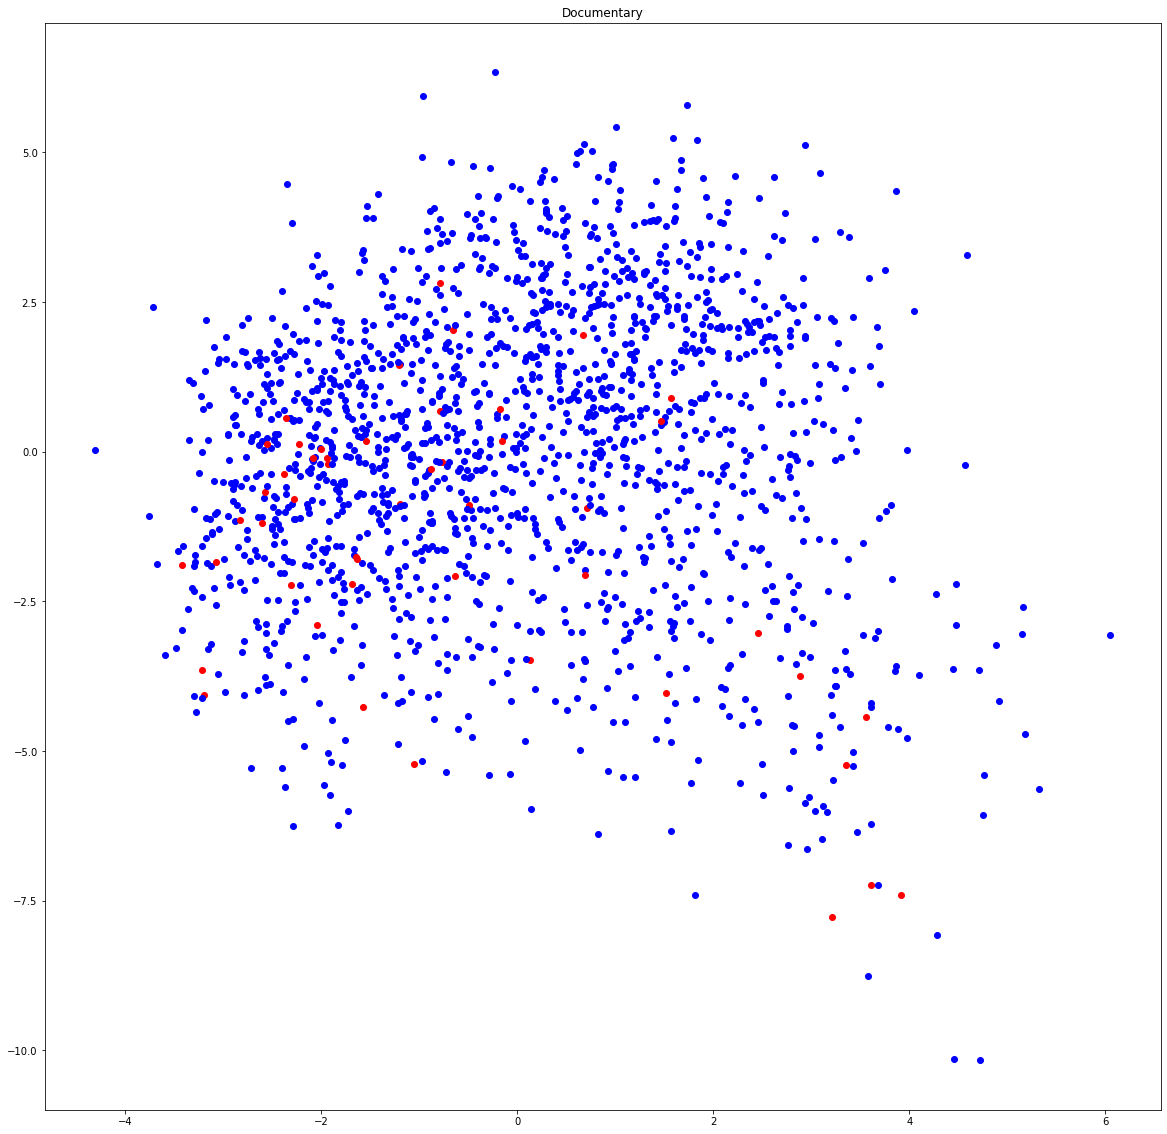

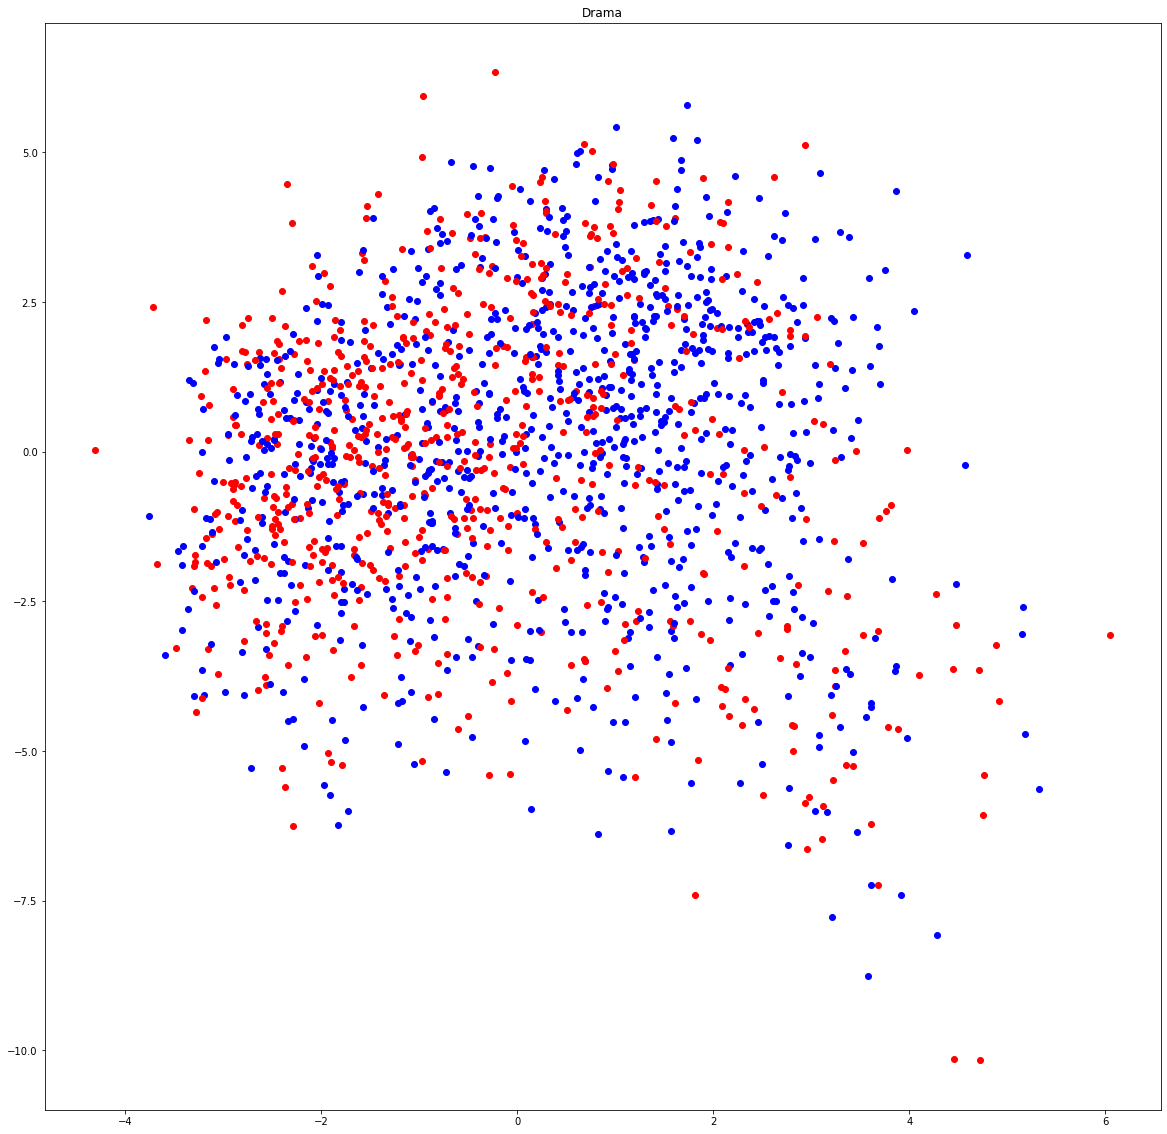

KeyboardInterrupt: 

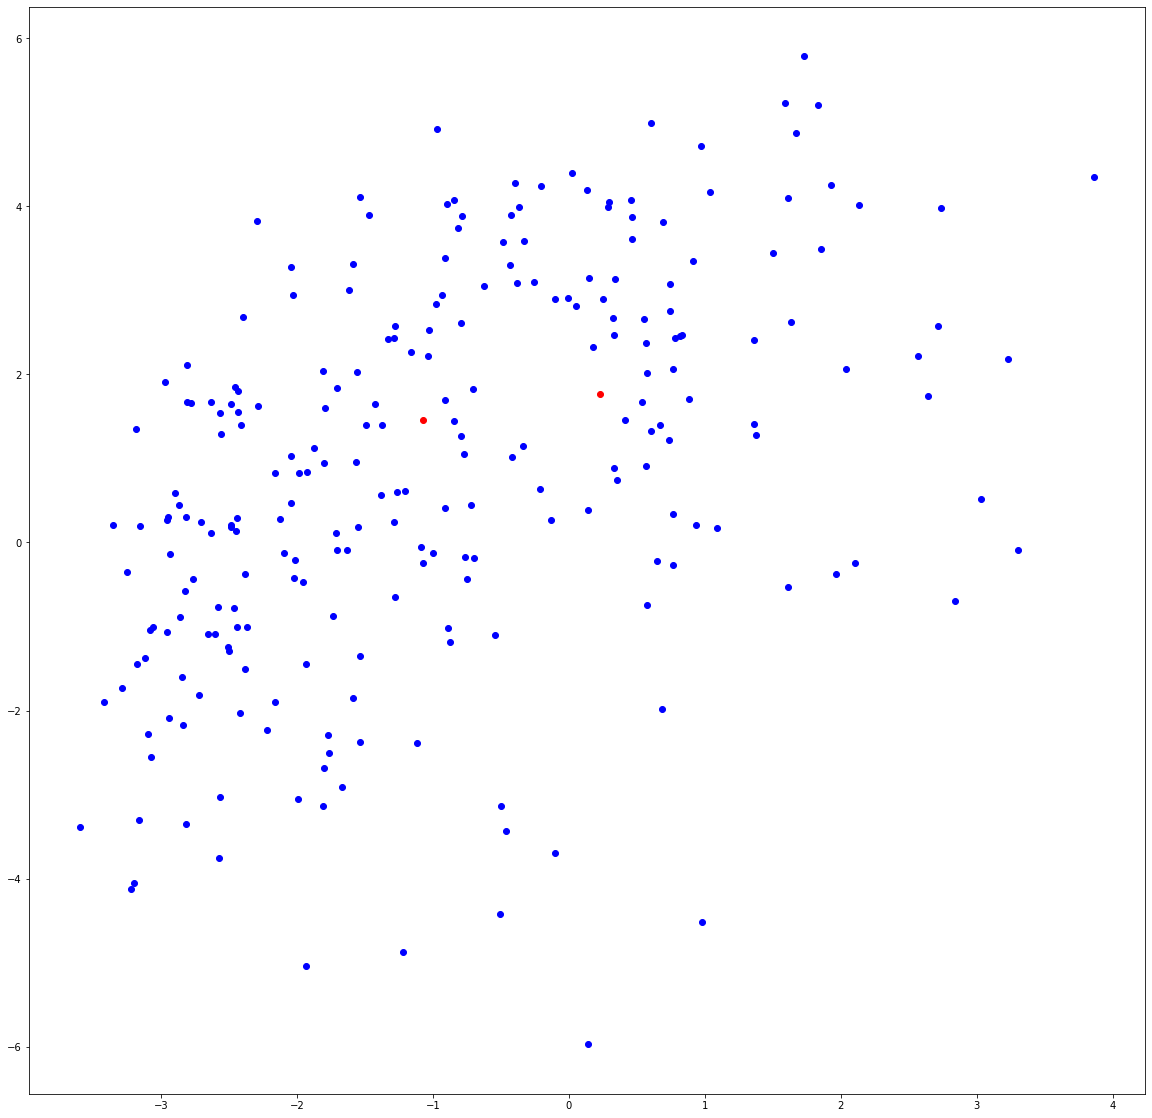

In [40]:
for genre in genres:
    ids_in_genre = movies[movies[genre] == 1]["Movie ID"]
    idx_in_genre = np.array(ids_in_genre) - 1
    plt.figure(figsize=(20,20))
    for idx in range(V_pn.shape[1]):
        color = 'r' if idx in idx_in_genre else 'b'
        plt.scatter(V_pn[0][idx], V_pn[1][idx], c=color)
    plt.title(genre)
    plt.show()

In [70]:
movies[movies["Movie Title"].str.contains('Trek')]

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
221,222,Star Trek: First Contact (1996),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
226,227,Star Trek VI: The Undiscovered Country (1991),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
227,228,Star Trek: The Wrath of Khan (1982),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
228,229,Star Trek III: The Search for Spock (1984),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
229,230,Star Trek IV: The Voyage Home (1986),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
379,380,Star Trek: Generations (1994),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
448,449,Star Trek: The Motion Picture (1979),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
449,450,Star Trek V: The Final Frontier (1989),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
starwars_ids = [50, 172, 181]
starwars_idx = np.array(starwars_ids) - 1

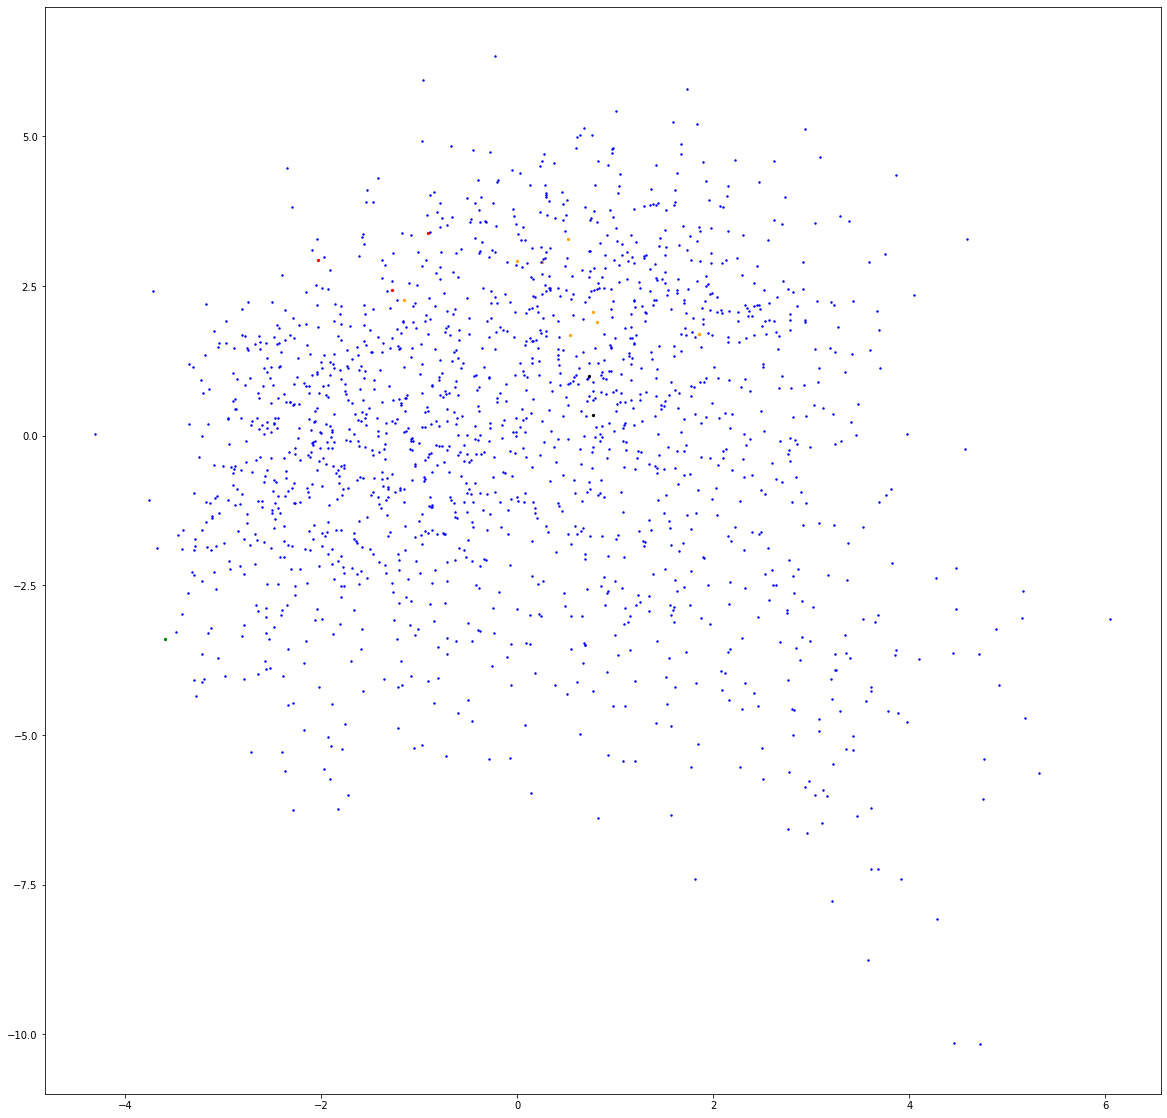

In [92]:
idx_in_genre = starwars_idx
plt.figure(figsize=(20,20))
for idx in range(V_pn.shape[1]):
    color = 'r' if idx in idx_in_genre else 'b' # Star wars
    if idx == 178:
        color = 'g'
    if idx in [221, 226, 227, 228, 229, 379, 448, 449]: #Star trek
        color = 'orange'
    if idx in [40, 762]: #Adam sandler: Billy madison
        color = 'black'
    plt.scatter(V_pn[0][idx], V_pn[1][idx], c=color, s=2 if color=='b' else 10)
plt.show()

In [65]:
movies

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Billy Madison 41 40
# Happy Gilmore 763 762
# Wedding Singer 354 353
movies[movies["Movie Title"].str.contains('Singer')]

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
353,354,"Wedding Singer, The (1998)",0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [77]:
list(movies[movies["Comedy"] == 1]["Movie Title"])

['Toy Story (1995)',
 'Get Shorty (1995)',
 'Babe (1995)',
 'Mighty Aphrodite (1995)',
 'French Twist (Gazon maudit) (1995)',
 'From Dusk Till Dawn (1996)',
 'Muppet Treasure Island (1996)',
 'Birdcage, The (1996)',
 'Brothers McMullen, The (1995)',
 'Batman Forever (1995)',
 'Doom Generation, The (1995)',
 'To Wong Foo, Thanks for Everything! Julie Newmar (1995)',
 'Billy Madison (1995)',
 'Clerks (1994)',
 'Eat Drink Man Woman (1994)',
 'Ed Wood (1994)',
 'I.Q. (1994)',
 'Santa Clause, The (1994)',
 "What's Eating Gilbert Grape (1993)",
 'While You Were Sleeping (1995)',
 'Ace Ventura: Pet Detective (1994)',
 'Forrest Gump (1994)',
 'Four Weddings and a Funeral (1994)',
 'Mask, The (1994)',
 'Maverick (1994)',
 'Faster Pussycat! Kill! Kill! (1965)',
 'Hot Shots! Part Deux (1993)',
 'Hudsucker Proxy, The (1994)',
 'Much Ado About Nothing (1993)',
 'Ref, The (1994)',
 'Sleepless in Seattle (1993)',
 'So I Married an Axe Murderer (1993)',
 'Nightmare Before Christmas, The (1993)',
 'Wel

In [81]:
movies[movies["Movie Title"].str.contains('Fury')]

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
